# WeatherPy
----
Observations:
	
    We are able to visually prove that the closer a city is to the equator the higher the temperature it presents.
    
    There is no strong correlation between latitude and cloudiness. There is an array of cities that have the clearest skies between Latitude 15 and 45. 
    
    There is no strong correlation between latitude and wind speeds. The cities with the strongest winds sit around Latitude 65 and Latitude -30 

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

593
http://api.openweathermap.org/data/2.5/weather?appid=ff6d83469a40427b4355c0953b2a73b0&units=metric&q=


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
counter = 0
record_counter = 0
setcount = 1


for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        print(setcount)
        print(record_counter)
        print(counter)
    record_counter += 1
    print("Processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    try:
        weather_response = requests.get(query_url + city).json()
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
    except:
        print("City not found. Skipping... " + city)
        
        
print(len(weather_response))

Processing Record 1 of Set 1 | alta floresta
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping... illoqqortoormiut
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping... taolanaro
Processing Record 4 of Set 1 | mehamn
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | lorengau
Processing Record 7 of Set 1 | mogadishu
Processing Record 8 of Set 1 | kalmunai
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | atambua
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | togur
Processing Record 17 of Set 1 | mareeba
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | saint-augustin
Processing Record 20 of Set 1 | nizwa
Processing Record 21 of Set 1 | erenhot
Processing Record 22 of Set 1 | canico
Processing Re

Processing Record 35 of Set 4 | real
Processing Record 36 of Set 4 | kapaa
Processing Record 37 of Set 4 | torbay
Processing Record 38 of Set 4 | provideniya
Processing Record 39 of Set 4 | lata
Processing Record 40 of Set 4 | bengkulu
Processing Record 41 of Set 4 | denizli
Processing Record 42 of Set 4 | luxor
Processing Record 43 of Set 4 | san quintin
Processing Record 44 of Set 4 | gold coast
Processing Record 45 of Set 4 | georgetown
Processing Record 46 of Set 4 | banmo
City not found. Skipping... banmo
Processing Record 47 of Set 4 | port hedland
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | aklavik
Processing Record 50 of Set 4 | tiznit
5
0
200
Processing Record 1 of Set 5 | nusaybin
Processing Record 2 of Set 5 | caravelas
Processing Record 3 of Set 5 | bambous virieux
Processing Record 4 of Set 5 | tsiroanomandidy
Processing Record 5 of Set 5 | kruisfontein
Processing Record 6 of Set 5 | ruteng
Processing Record 7 of Set 5 | iralaya
Processing Record 

Processing Record 18 of Set 8 | axim
Processing Record 19 of Set 8 | hvolsvollur
Processing Record 20 of Set 8 | imeni zhelyabova
Processing Record 21 of Set 8 | lakhipur
Processing Record 22 of Set 8 | qaqortoq
Processing Record 23 of Set 8 | karaul
City not found. Skipping... karaul
Processing Record 24 of Set 8 | farkhor
Processing Record 25 of Set 8 | maldonado
Processing Record 26 of Set 8 | bud
Processing Record 27 of Set 8 | ust-kut
Processing Record 28 of Set 8 | formoso do araguaia
City not found. Skipping... formoso do araguaia
Processing Record 29 of Set 8 | natal
Processing Record 30 of Set 8 | verkhoyansk
Processing Record 31 of Set 8 | palabuhanratu
City not found. Skipping... palabuhanratu
Processing Record 32 of Set 8 | mandalgovi
Processing Record 33 of Set 8 | rawannawi
City not found. Skipping... rawannawi
Processing Record 34 of Set 8 | mirnyy
Processing Record 35 of Set 8 | sampit
Processing Record 36 of Set 8 | quartucciu
Processing Record 37 of Set 8 | arraial do

Processing Record 2 of Set 12 | kaoma
Processing Record 3 of Set 12 | upington
Processing Record 4 of Set 12 | sur
Processing Record 5 of Set 12 | jertih
Processing Record 6 of Set 12 | buala
Processing Record 7 of Set 12 | kamaishi
Processing Record 8 of Set 12 | udachnyy
Processing Record 9 of Set 12 | jaru
Processing Record 10 of Set 12 | toul
Processing Record 11 of Set 12 | maiduguri
Processing Record 12 of Set 12 | chadan
Processing Record 13 of Set 12 | comodoro rivadavia
Processing Record 14 of Set 12 | mbarara
Processing Record 15 of Set 12 | natchez
Processing Record 16 of Set 12 | pokrovsk
Processing Record 17 of Set 12 | gizo
Processing Record 18 of Set 12 | zhigansk
Processing Record 19 of Set 12 | road town
Processing Record 20 of Set 12 | yangjiang
Processing Record 21 of Set 12 | kumano
Processing Record 22 of Set 12 | dukat
Processing Record 23 of Set 12 | nioro
Processing Record 24 of Set 12 | rabo de peixe
Processing Record 25 of Set 12 | spirit river
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_dict = {"city":city_list,
                "lat":lat_list,
                "lng":lng_list,
                "max_temp":max_temp_list,
                "humidity":humidity_list,
                "cloudiness":cloudiness_list,
                "windspeed":windspeed_list
}

In [24]:
weather_df = pd.DataFrame(weather_dict)
pd.DataFrame.to_csv(weather_df, output_data_file)


In [25]:
weather_df.head()

,city,lat,lng,max_temp,humidity,cloudiness,windspeed
0,Alta Floresta,-9.8756,-56.0861,21.52,99,100,1.22
1,Mehamn,71.0357,27.8492,-1.98,84,100,8.13
2,Jamestown,42.0970,-79.2353,4.73,99,90,6.26
3,Lorengau,-2.0226,147.2712,29.01,76,69,3.20
4,Mogadishu,2.0371,45.3438,26.88,76,40,6.34


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

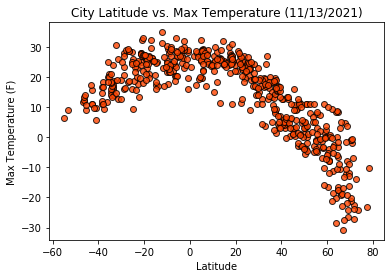

In [7]:
plt.scatter(weather_df['lat'], weather_df['max_temp'], edgecolor="black", linewidths=1, marker="o", color="orangered",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (11/13/2021)")
plt.savefig("../Images/Max_temp.png")
plt.show()

## Latitude vs. Humidity Plot

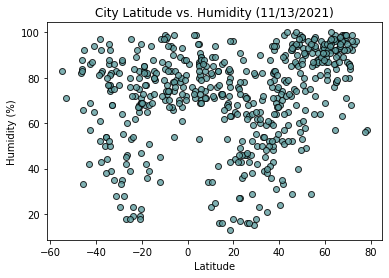

In [8]:
plt.scatter(weather_df['lat'], weather_df['humidity'], edgecolor="black", linewidths=1, marker="o", color="cadetblue",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (11/13/2021)")
plt.savefig("../Images/Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

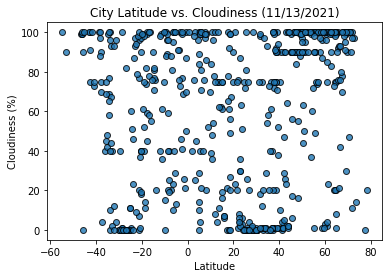

In [9]:
plt.scatter(weather_df['lat'], weather_df['cloudiness'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (11/13/2021)")
plt.savefig("../Images/Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

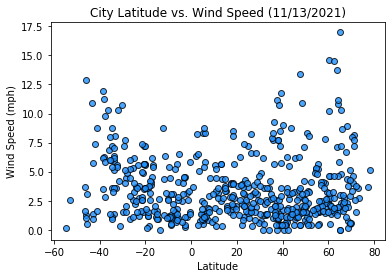

In [10]:
plt.scatter(weather_df['lat'], weather_df['windspeed'], edgecolor="black", linewidths=1, marker="o", color="dodgerblue", 
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (11/13/2021)")
plt.savefig("../Images/Wind_Speed.png")
plt.show()

## Linear Regression

In [11]:
northern = weather_df.loc[weather_df['lat']>0]
southern = weather_df.loc[weather_df['lat']<0]
northern.head()

,city,lat,lng,max_temp,humidity,cloudiness,windspeed
1,Mehamn,71.0357,27.8492,-1.98,84,100,8.13
2,Jamestown,42.0970,-79.2353,4.73,99,90,6.26
4,Mogadishu,2.0371,45.3438,26.88,76,40,6.34
5,Kalmunai,7.4167,81.8167,27.51,74,97,0.83
7,Upernavik,72.7868,-56.1549,-14.02,95,97,3.58


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7841957576175644


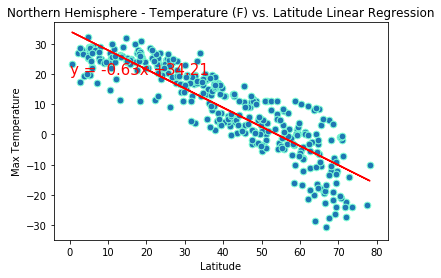

In [12]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['lat'], northern['max_temp'])
regress_values = (northern['lat'] * slope + intercept)
plt.plot(northern['lat'], regress_values, 'r-')
plt.scatter(northern['lat'], northern['max_temp'], marker='o', edgecolor="aquamarine", s=45)
plt.title(f'Northern Hemisphere - Temperature (F) vs. Latitude Linear Regression')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.savefig("../Images/northern_temp_vs_lat.png", bbox_inches="tight")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4360987118863147


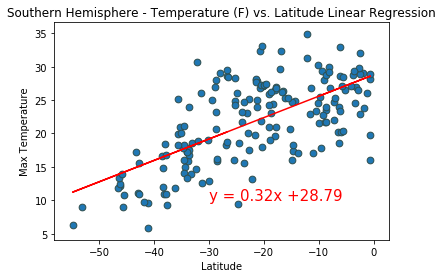

In [13]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['lat'], southern['max_temp'])
regress_values = (southern['lat'] * slope + intercept)
plt.plot(southern['lat'], regress_values, 'r-')
plt.scatter(southern['lat'], southern['max_temp'], marker='o', edgecolor="darkslategrey", s=45)
plt.title(f'Southern Hemisphere - Temperature (F) vs. Latitude Linear Regression')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-30, 10),fontsize=15,color="red")
plt.savefig("../Images/southern_temp_vs_lat.png", bbox_inches="tight")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12891777041919755


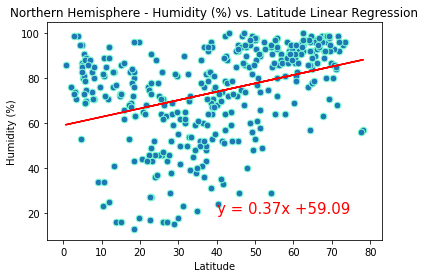

In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['lat'], northern['humidity'])
regress_values = (northern['lat'] * slope + intercept)
plt.plot(northern['lat'], regress_values, 'r-')
plt.scatter(northern['lat'], northern['humidity'], marker='o', edgecolor="aquamarine", s=45)
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.savefig("../Images/northern_humi_vs_lat.png", bbox_inches="tight")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03272583543806888


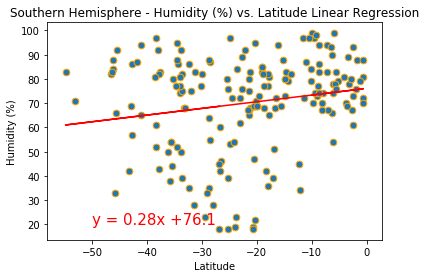

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['lat'], southern['humidity'])
regress_values = (southern['lat'] * slope + intercept)
plt.plot(southern['lat'], regress_values, 'r-')
plt.scatter(southern['lat'], southern['humidity'], marker='o', edgecolor="orange", s=45)
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.savefig("../Images/southern_humi_vs_lat.png", bbox_inches="tight")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07316286666140476


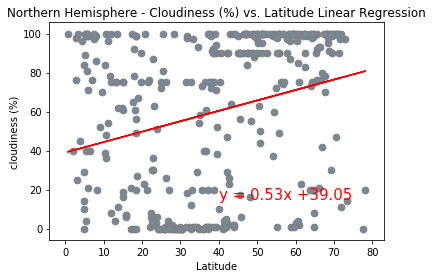

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['lat'], northern['cloudiness'])
regress_values = (northern['lat'] * slope + intercept)
plt.plot(northern['lat'], regress_values, 'r-')
plt.scatter(northern['lat'], northern['cloudiness'], marker='o', color= "lightslategrey", edgecolor="grey", s=45)
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.ylabel('cloudiness (%)')
plt.xlabel('Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.savefig("../Images/northern_cloud_vs_lat.png", bbox_inches="tight")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 4.1929010863534225e-05


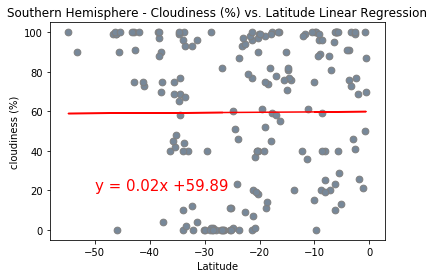

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['lat'], southern['cloudiness'])
regress_values = (southern['lat'] * slope + intercept)
plt.plot(southern['lat'], regress_values, 'r-')
plt.scatter(southern['lat'], southern['cloudiness'], marker='o', color= "lightslategrey", edgecolor="grey", s=45)
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.ylabel('cloudiness (%)')
plt.xlabel('Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
plt.savefig("../Images/southern_cloud_vs_lat.png", bbox_inches="tight")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011940748117593379


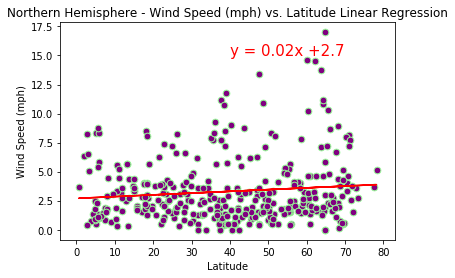

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['lat'], northern['windspeed'])
regress_values = (northern['lat'] * slope + intercept)
plt.plot(northern['lat'], regress_values, 'r-')
plt.scatter(northern['lat'], northern['windspeed'], marker='o', color= "purple", edgecolor="palegreen", s=45)
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.savefig("../Images/northern_wind_vs_lat.png", bbox_inches="tight")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12184246396140795


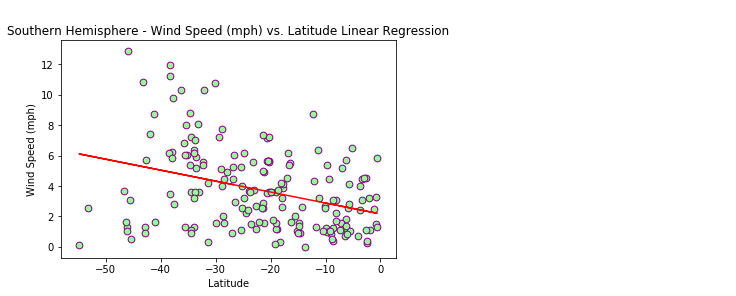

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern['lat'], southern['windspeed'])
regress_values = (southern['lat'] * slope + intercept)
plt.plot(southern['lat'], regress_values, 'r-')
plt.scatter(southern['lat'], southern['windspeed'], marker='o', color= "palegreen", edgecolor="purple", s=45)
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.savefig("../Images/northern_wind_vs_lat.png", bbox_inches="tight")
print(f"The r-squared is: {rvalue**2}")
plt.show()